In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('Iris.csv')
ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x=ds.iloc[:,1:5].values

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

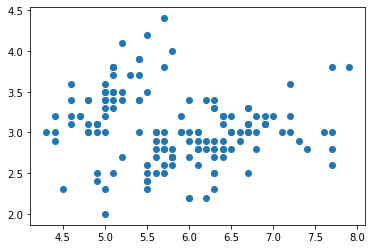

In [5]:
#scatter plot between first two columns in x
plt.scatter(x[:,0],x[:,1])

In [6]:
from sklearn.cluster import KMeans
wcss=[]

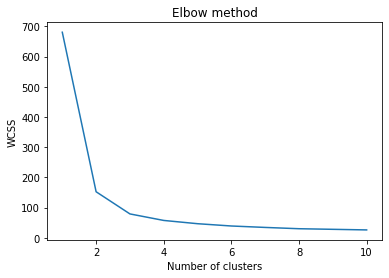

In [7]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  #to calculate wcss, method is inertia_
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As WCSS doesn't decrease significantly we should consider k as 3 i.e.,number of clusters as 3

In [8]:
k=KMeans(n_clusters=3,init='k-means++',random_state=0)
ymeans=k.fit_predict(x)
ymeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [9]:
k.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

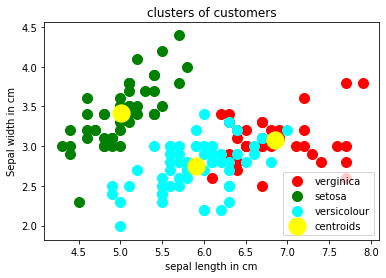

In [10]:
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,color='red',label='verginica')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,color='green',label='setosa')
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,color='cyan',label='versicolour')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=300,color='yellow',label='centroids')
plt.title('clusters of customers')
plt.xlabel('sepal length in cm')
plt.ylabel('Sepal width in cm')
plt.legend()
plt.show()

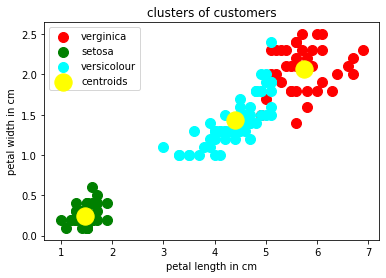

In [11]:
plt.scatter(x[ymeans==0,2],x[ymeans==0,3],s=100,color='red',label='verginica')
plt.scatter(x[ymeans==1,2],x[ymeans==1,3],s=100,color='green',label='setosa')
plt.scatter(x[ymeans==2,2],x[ymeans==2,3],s=100,color='cyan',label='versicolour')
plt.scatter(k.cluster_centers_[:,2],k.cluster_centers_[:,3],s=300,color='yellow',label='centroids')
plt.title('clusters of customers')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.legend()
plt.show()